# 5주차_비선형회귀분석

## 1. 모듈 불러오기

### 사이트 참고
- https://datascienceschool.net/notebook/

### statsmodels
- 다양한 통계분석 기능을 제공하는 파이썬 패키지

### sklearn
- 벤치마크용 데이터셋 예제
- 데이터 전처리(preprocessing)
- 모형 평가 및 선택 (evaluation and selection)

### matplotlib
- 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지

In [0]:
from IPython.display import display, HTML

# 데이터 전처리
import numpy as np
import pandas as pd

# 기계학습 모델
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

## Universal bank 데이터
#### 설명변수 및 반응변수
- ID - 고객 고유번호, Index <br>
- Age - 고객의 연령 (연속형) <br>
- Experienc - 고객의 경력 (연속형) <br>
- Incom - 고객의 연간 수입 (연속형) <br>
- ZIP Code - 고객 주소 ZIP Code <br>
- Family - 고객의 가족 규모 (연속형) <br>
- CCAvg - 평균 신용 카드 지출 (연속형) <br>
- Education - 교육 수준 (범주형 - 1: 대학교 졸업, 2: 대학원 졸업, 3: 고급/전문) <br>
- Mortgag - 주택 모기지의 가치 (연속형) <br>
- <b> PersonalLoan - 고객은 마지막 캠페인에 제공된 개인 대출을 수락 하였나? (범주형 - 0: 아니오, 1: 예) >> [타겟 변수]</b> <br>
- SecuritiesAccount - 고객은 은행에 증권 계좌를 가지고 있는가? (범주형 - 0: 아니오, 1: 예) <br>
- CDAccount - 고객은 은행에 예금 계좌를 가지고 있는가?	(범주형 - 0: 아니오, 1: 예) <br>
- Online - 고객이 인터넷 뱅킹 시설을 사용하는가? (범주형 - 0: 아니오, 1: 예) <br>
- CreditCard - 고객이 Universal Bank에서 발행 한 신용 카드를 사용하는가? (범주형 - 0: 아니오, 1: 예)

In [0]:
url = "https://raw.githubusercontent.com/Mosses1103/PythonStudy/master/WEEK_4_Data/UniversalBank.csv"

In [0]:
data = pd.read_csv(url)
data.head()

## 2. 데이터 전처리 및 탐색적 데이터 분석

### 예측에 필요하지 않은 변수 제거 : 'ID', 'ZIP Code'

In [0]:
data = data.drop(['ID','ZIP Code'], axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


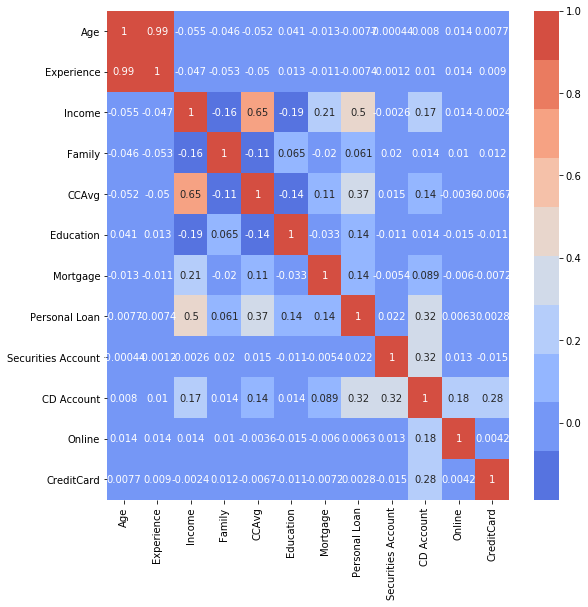

In [0]:
plt.figure(figsize=(9, 9))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=data.corr()) # 변수간 상관관계 확인

### 나이, 수입, 평균 신용 카드 지출, 대출 여부 관계

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 576x576 with 0 Axes>

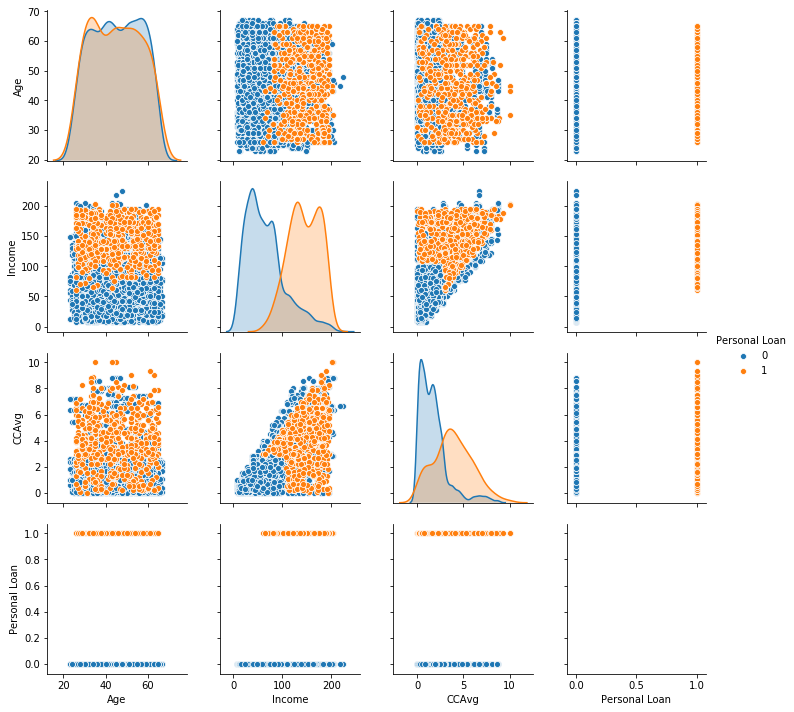

In [0]:
plt.figure(figsize = (8,8))
sns.pairplot(data[['Age', 'Income', 'CCAvg', 'Personal Loan']], hue="Personal Loan")
#sns.pairplot(data[['Age', 'Income', 'CCAvg', 'Personal Loan']])
plt.show()

### Education 변수에 대한 더미 변수 생성
- Education - 교육 수준 (범주형 - 1: 대학교 졸업, 2: 대학원 졸업, 3: 고급/전문) 

In [0]:
# 데이터 범주형을 0 , 1로 축소
TestData = pd.DataFrame({"cat": ["a고양이", "b고양이", "c고양이", "a고양이", "c고양이", "a고양이"]})
pd.get_dummies(TestData)

,cat_a고양이,cat_b고양이,cat_c고양이
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1
5,1,0,0


In [0]:
data['Education'].head(10)

0    1
1    1
2    1
3    2
4    2
5    2
6    2
7    3
8    2
9    3
Name: Education, dtype: int64

In [0]:
pd.get_dummies(data['Education']).head(5)

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [0]:
pd.get_dummies(data['Education'], drop_first=True).head(10) # 첫번째 행은 없더라도 값을 유추할 수 있다. ()00 = 1 / ()01 = 0

,2,3
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [0]:
education_dummy = pd.get_dummies(data['Education'], drop_first=True)
education_dummy.columns = ['Edu_Dummy_1', 'Edu_Dummy_2']
display(education_dummy.head())

,Edu_Dummy_1,Edu_Dummy_2
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


### 기존 Education 변수 제거하고, 더미 변수 추가

In [0]:
data = data.drop('Education', axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,0,0,1,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,0,1


In [0]:
data = pd.concat([data, education_dummy], axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_Dummy_1,Edu_Dummy_2
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


### 타겟 변수의 클래스 비율 확인

In [0]:
display(data['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64

### 타겟 변수의 클래스 비율 유지하며 Train/Test 데이터 분리
- 설명변수(X), 반응변수(y) 나누기
- Training 데이터 70% / Testing 데이터 30% 나누기

In [0]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=20191015)

In [0]:
X_train = train_data.drop('Personal Loan',axis=1)
y_train = train_data['Personal Loan']
X_test = test_data.drop('Personal Loan',axis=1)
y_test = test_data['Personal Loan']

In [0]:
print('클래스별 데이터 개수: Training 데이터  ')
display(y_train.value_counts())
print('클래스별 데이터 개수: Testing')
display(y_test.value_counts())

클래스별 데이터 개수: Training 데이터  


0    3155
1     345
Name: Personal Loan, dtype: int64

클래스별 데이터 개수: Testing


0    1365
1     135
Name: Personal Loan, dtype: int64

## 3. 모델링
- statsmodels(sm) 의 logistic 회귀모델 (Logistic) 함수를 이용하자.
- model = sm.logit(y데이터,x데이터)

In [0]:
model = sm.Logit(y_train, X_train) # 최대 우도 추정법
model_fitted = model.fit(method='newton') # 수치최적화 알고리즘

Optimization terminated successfully.
         Current function value: 0.116993
         Iterations 9


## 4. 모델 결과물 확인
- Pseudo R-squ. : 100% 정확한 경우에는 1이 되고 모형의 성능이 나빠질 수록 값이 작다
- coef : exp(coef) = odd, 승산 비율
- p>|z| : 값의 신뢰도, 일반적으로 0.05 이상일 경우 신뢰하기 힘든 변수

In [0]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Mon, 14 Oct 2019   Pseudo R-squ.:                  0.6366
Time:                        11:30:53   Log-Likelihood:                -409.47
converged:                       True   LL-Null:                       -1126.8
Covariance Type:            nonrobust   LLR p-value:                4.163e-301
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.5014      0.027    -18.503      0.000      -0.555      -0.448
Experience             0.4964      0.030     16.532      0.000       0.438       0.555
Income                 0.0581      0.003     16.774      0.000       0.051       0.065
Family                 0.5731      0.091      6.300      0.000       0.395       0.751
CCAvg                  0.1766      0.052      3.401      0.001       0.075       0.278
Mortgage               0.0005      0.001      0.741      0.459      -0.001       0.002
Securities Account    -1.0203      0.366     -2.791      0.005      -1.737      -0.304
CD Account             3.9851      0.416      9.573      0.000       3.169       4.801
Online                -0.8393      0.199     -4.226      0.000      -1.229      -0.450
CreditCard            -1.0908      0.254     -4.291      0.000      -1.589      -0.593
Edu_Dummy_1            3.9830      0.314     12.705      0.000       3.368       4.597
Edu_Dummy_2            4.1786      0.318     13.160      0.000       3.556       4.801
======================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [0]:
pvalues = model_fitted.pvalues.index[model_fitted.pvalues > 0.01]
print(pvalues)

Index(['Mortgage'], dtype='object')


#### coef 확인

In [0]:
model_fitted.params

Age                  -0.501389
Experience            0.496411
Income                0.058057
Family                0.573115
CCAvg                 0.176616
Mortgage              0.000529
Securities Account   -1.020295
CD Account            3.985113
Online               -0.839299
CreditCard           -1.090807
Edu_Dummy_1           3.982952
Edu_Dummy_2           4.178611
dtype: float64

#### odds ratio 확인

In [0]:
np.exp(model_fitted.params)

Age                    0.605689
Experience             1.642814
Income                 1.059775
Family                 1.773784
CCAvg                  1.193172
Mortgage               1.000529
Securities Account     0.360489
CD Account            53.791380
Online                 0.432013
CreditCard             0.335945
Edu_Dummy_1           53.675267
Edu_Dummy_2           65.275108
dtype: float64

## 5. 모델 예측 성능 구하기

### 로지스틱회귀분석 모델의 출력 값은 "클래스 1에 속할 확률"

- training 데이터 예측성능을 평가해보자

In [0]:
train_prob = model_fitted.predict(X_train)
train_results = pd.concat([train_prob, y_train], axis=1)
train_results.columns = ['예측 Personal Loan', '실제 Personal Loan']
display(train_results.head())

,예측 Personal Loan,실제 Personal Loan
344,0.000735,0
98,0.000368,0
3803,0.210946,0
4413,0.001836,0
1740,0.002268,0


- Testing 데이터 예측성능을 평가해보자

In [0]:
test_prob = model_fitted.predict(X_test)
test_results = pd.concat([test_prob, y_test], axis=1)
test_results.columns = ['예측 Personal Loan', '실제 Personal Loan']
display(test_results.head())

,예측 Personal Loan,실제 Personal Loan
954,0.940068,1
2550,0.001051,0
3015,0.000207,0
4969,0.006972,0
2895,0.014649,0


### 확률 값을 기준으로 최종 클래스 결정 (0.5를 기준으로)
- 기준값 : threshold

In [0]:
train_class = train_prob.copy()
test_class = test_prob.copy()

In [0]:
train_class.head()

344     0.000735
98      0.000368
3803    0.210946
4413    0.001836
1740    0.002268
dtype: float64

In [0]:
train_class[train_class > 0.5] = 1
train_class[train_class <= 0.5] = 0

test_class[test_class > 0.5] = 1
test_class[test_class <= 0.5] = 0

In [0]:
train_class.value_counts()

0.0    3219
1.0     281
dtype: int64

In [0]:
test_class.value_counts()

0.0    1397
1.0     103
dtype: int64

## 6. Classification 결과 평가

### 데이터에 대한 정확도
- 참고 URL : https://frhyme.github.io/machine-learning/clf_%ED%8F%89%EA%B0%80%ED%95%98%EA%B8%B0/
- confusion_matrix : Positive/Negative를 예측
- accuracy_score : 정확하게 예측 된 레이블 / 전체 레이블 수 

In [0]:
confusion_matrix(y_train, train_class) # 실제 값 vs 예측 값

array([[3116,   39],
       [ 103,  242]])

In [0]:
display( pd.DataFrame(confusion_matrix(y_train, train_class), columns=[0,1], index=[0,1]) )
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, train_class)))
print('Training Accuracy:',(3116+242)/(3116+39+103+242))

,0,1
0,3116,39
1,103,242


Training Accuracy: 0.959
Training Accuracy: 0.9594285714285714


In [0]:
display(pd.DataFrame(confusion_matrix(y_test, test_class), columns=[0,1], index=[0,1]))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, test_class)))
print('Training Accuracy:',(1347+85)/(1347+18+50+85))

,0,1
0,1347,18
1,50,85


Testing Accuracy: 0.955
Training Accuracy: 0.9546666666666667


## 7. 기준값(threshold) 바꿔보기

In [0]:
train_class_2 = train_prob.copy()
test_class_2 = test_prob.copy()

train_class_2[train_class_2 > 0.3] = 1
train_class_2[train_class_2 <= 0.3] = 0

test_class_2[test_class_2 > 0.3] = 1
test_class_2[test_class_2 <= 0.3] = 0

print('Train Accuracy: {:.3f}'.format(accuracy_score(y_train, train_class_2)))
display(pd.DataFrame(confusion_matrix(y_train, train_class_2), columns=[0,1], index=[0,1]))
print('Test Accuracy: {:.3f}'.format(accuracy_score(y_test, test_class_2)))
display(pd.DataFrame(confusion_matrix(y_test, test_class_2), columns=[0,1], index=[0,1]))

Train Accuracy: 0.955


,0,1
0,3070,85
1,74,271


Test Accuracy: 0.942


,0,1
0,1320,45
1,42,93


In [0]:
train_class_3 = train_prob.copy()
test_class_3 = test_prob.copy()

train_class_3[train_class_3 > 0.1] = 1
train_class_3[train_class_3 <= 0.1] = 0

test_class_3[test_class_3 > 0.1] = 1
test_class_3[test_class_3 <= 0.1] = 0

print('Train Accuracy: {:.3f}'.format(accuracy_score(y_train, train_class_3)))
display(pd.DataFrame(confusion_matrix(y_train, train_class_3), columns=[0,1], index=[0,1]))
print('Test Accuracy: {:.3f}'.format(accuracy_score(y_test, test_class_3)))
display(pd.DataFrame(confusion_matrix(y_test, test_class_3), columns=[0,1], index=[0,1]))

Train Accuracy: 0.904


,0,1
0,2849,306
1,30,315


Test Accuracy: 0.891


,0,1
0,1225,140
1,23,112


## 8. 최적의 기준값(threshold) 구하기

- Train Data

In [0]:
for threshold in np.arange(0.1, 1.0, 0.1):
    train_pred = (train_prob.values > threshold)
    print('Threshold: {:.2f} - train Accuracy: {:.4f}'.format(threshold, accuracy_score(y_train, train_pred)))

Threshold: 0.10 - train Accuracy: 0.9040
Threshold: 0.20 - train Accuracy: 0.9409
Threshold: 0.30 - train Accuracy: 0.9546
Threshold: 0.40 - train Accuracy: 0.9597
Threshold: 0.50 - train Accuracy: 0.9594
Threshold: 0.60 - train Accuracy: 0.9577
Threshold: 0.70 - train Accuracy: 0.9540
Threshold: 0.80 - train Accuracy: 0.9497
Threshold: 0.90 - train Accuracy: 0.9426


- Test Data

In [0]:
BEST_Threshod = 0
MAX_Accuancy = 0
for threshold in np.arange(0.1, 1.0, 0.05):
    test_pred = (test_prob.values > threshold)
    print('Threshold: {:.2f} - Test Accuracy: {:.4f}'.format(threshold, accuracy_score(y_test, test_pred)))
    
    if (MAX_Accuancy < accuracy_score(y_test, test_pred)): # 최적의 accuracy_score 구하기
      MAX_Accuancy = accuracy_score(y_test, test_pred)
      BEST_Threshod = threshold
      
print('최적의 Threshold :',round(BEST_Threshod,2) )

Threshold: 0.10 - Test Accuracy: 0.8913
Threshold: 0.15 - Test Accuracy: 0.9180
Threshold: 0.20 - Test Accuracy: 0.9280
Threshold: 0.25 - Test Accuracy: 0.9340
Threshold: 0.30 - Test Accuracy: 0.9420
Threshold: 0.35 - Test Accuracy: 0.9507
Threshold: 0.40 - Test Accuracy: 0.9513
Threshold: 0.45 - Test Accuracy: 0.9547
Threshold: 0.50 - Test Accuracy: 0.9547
Threshold: 0.55 - Test Accuracy: 0.9567
Threshold: 0.60 - Test Accuracy: 0.9553
Threshold: 0.65 - Test Accuracy: 0.9540
Threshold: 0.70 - Test Accuracy: 0.9533
Threshold: 0.75 - Test Accuracy: 0.9520
Threshold: 0.80 - Test Accuracy: 0.9493
Threshold: 0.85 - Test Accuracy: 0.9467
Threshold: 0.90 - Test Accuracy: 0.9440
Threshold: 0.95 - Test Accuracy: 0.9340
최적의 Threshold : 0.55


## 9. 나만의 모델 만들기

- MyModel 생성

In [0]:
data = pd.read_csv(url) # 데이터 생성
MyData = data.drop(['ID','ZIP Code','Income','CCAvg','Mortgage'], axis=1) # 쓸모없는 데이터 제거

train_data, test_data = train_test_split(MyData, test_size=0.3, random_state=20191015) # 데이터 분리
MyModel_X_train = train_data.drop('Personal Loan',axis=1)
MyModel_y_train = train_data['Personal Loan']
MyModel_X_test = test_data.drop('Personal Loan',axis=1)
MyModel_y_test = test_data['Personal Loan']

MyModel = sm.Logit(MyModel_y_train, MyModel_X_train) # 최대 우도 추정법
MyModel_fitted = MyModel.fit(method='newton') # 수치최적화 알고리즘

Optimization terminated successfully.
         Current function value: 0.262592
         Iterations 7


- 요약

In [0]:
MyModel_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3492
Method:                           MLE   Df Model:                            7
Date:                Mon, 14 Oct 2019   Pseudo R-squ.:                  0.1843
Time:                        13:00:04   Log-Likelihood:                -919.07
converged:                       True   LL-Null:                       -1126.8
Covariance Type:            nonrobust   LLR p-value:                 1.196e-85
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.1395      0.010    -13.560      0.000      -0.160      -0.119
Experience             0.1306      0.013      9.808      0.000       0.104       0.157
Family                 0.1739      0.054      3.220      0.001       0.068       0.280
Education              0.6316      0.078      8.105      0.000       0.479       0.784
Securities Account    -1.1941      0.236     -5.064      0.000      -1.656      -0.732
CD Account             4.0723      0.252     16.183      0.000       3.579       4.565
Online                -0.6085      0.135     -4.492      0.000      -0.874      -0.343
CreditCard            -1.1421      0.185     -6.178      0.000      -1.504      -0.780
======================================================================================
"""

- Odd

In [0]:
np.exp(MyModel_fitted.params)

Age                    0.869826
Experience             1.139499
Family                 1.189972
Education              1.880634
Securities Account     0.302976
CD Account            58.688932
Online                 0.544158
CreditCard             0.319158
dtype: float64

- 결과 평가

In [0]:
my_train_prob = MyModel_fitted.predict(MyModel_X_train)
my_train_class = my_train_prob.copy()

train_class[my_train_class > 0.5] = 1
train_class[my_train_class <= 0.5] = 0

display(pd.DataFrame(confusion_matrix(MyModel_y_train, train_class), columns=[0,1], index=[0,1]))
print('Testing Accuracy: {:.3f}'.format(accuracy_score(MyModel_y_train, train_class)))

,0,1
0,3121,34
1,266,79


Testing Accuracy: 0.914


- 원하는 데이터 넣어보기

In [0]:
myInput = pd.DataFrame(
    {
     "Age": [27]                               # 고객의 연령
     ,"Experience": [2]                        # 고객의 경력
     ,"Family": [4]                            # 고객의 가족 규모
     ,"Securities Account": [0]                # 고객은 은행에 증권 계좌를 가지고 있는가?                  (범주형 - 0: 아니오, 1: 예)
     ,"CD Account": [0]                        # 고객은 은행에 예금 계좌를 가지고 있는가?	                (범주형 - 0: 아니오, 1: 예)
     ,"Online": [1]                            # 고객이 인터넷 뱅킹 시설을 사용하는가?                     (범주형 - 0: 아니오, 1: 예)
     ,"CreditCard": [0]                        # 고객이 Universal Bank에서 발행 한 신용 카드를 사용하는가? (범주형 - 0: 아니오, 1: 예)
     ,"Education": [1]                         # 교육 수준                                                 (범주형 - 1: 대학교 졸업, 2: 대학원 졸업, 3: 고급/전문)
    }
)
my_pred = MyModel_fitted.predict(myInput)

- 예측 결과

In [0]:
if my_pred[0] > 0.5:
  print("고객은 마지막 캠페인에 제공된 개인 대출을 '수락'할 것입니다.")
else:
  print("고객은 마지막 캠페인에 제공된 개인 대출을 '거절'할 것입니다.")
print("예측값 :",my_pred[0])

고객은 마지막 캠페인에 제공된 개인 대출을 '수락'할 것입니다.
예측값 : 0.5303610237633021
